In [1]:
#import streamlit as st
import pandas as pd

In [2]:
from Features import world_constructions as WCf

In [3]:
import base64
from io import BytesIO
from PIL import Image


def base64_to_image(base64_string):
    # Remove the data URI prefix if present
    if "data:image" in base64_string:
        base64_string = base64_string.split(",")[1]
    # Decode the Base64 string into bytes
    image_bytes = base64.b64decode(base64_string)
    return image_bytes

def create_image_from_bytes(image_bytes):
    # Create a BytesIO object to handle the image data
    image_stream = BytesIO(image_bytes)

    # Open the image using Pillow (PIL)
    image = Image.open(image_stream)
    return image

def resize_image(image, new_width):
    # Open the image

    # Calculate the new height while maintaining the aspect ratio
    original_width, original_height = image.size
    aspect_ratio = original_height / original_width
    new_height = int(new_width * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height))

    return resized_image

### Loading Postgress

In [4]:
df = WCf.world_construction.init_luxury_gallery()
df.head(2)

,id,prod_id,Detail,Summary,Brand,Price,base64
0,161,1,Type: Shirt / Fit: Regular fit / ...,The item is a Gucci silk shirt featuring an op...,Gucci,1500.0,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."
1,162,2,Type: Shirt / Fit: Regular fit / Sleeve...,The Gucci cotton Oxford GG shirt with an optic...,Gucci,650.0,"[data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA..."


In [5]:
i = 4
description = df.iloc[i].Summary
row = df.iloc[i]
detail = df.iloc[i].Detail

df.iloc[i]

id                                                       165
prod_id                                                    5
Detail      Type: Shirt   /  Fit: Regular fit   /  Sleeve...
Summary    The garment in question is a Gucci cotton popl...
Brand                                                  Gucci
Price                                                 1100.0
base64     [data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAA...
Name: 4, dtype: object

In [6]:
row['base64'][-len(row['base64'])+1]

'data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHqAtoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKDwOaKo3VxuJjQ8fxGgBZtSjiIAUsCcZpDfs

In [7]:
description

"The garment in question is a Gucci cotton poplin shirt, inspired by the summer spirit and beach club aesthetics. It features a regular fit with long sleeves and a classic collar, characterized by a button-down front. The neckline is a standard shirt collar style, made from lightweight, breathable cotton poplin, ideal for warm seasons. The shirt is predominantly a light cream color. It has a refined texture with no visible transparency, suggesting a high-quality weave. The shirt's length extends to the hips, maintaining a traditional shape. There are no visible pockets, embellishments, or patterns, giving it a clean and minimalist look. This shirt is suitable for casual to semi-formal occasions, thanks to its simple yet elegant design. The fabric's fluidity and weight make it comfortable and airy, perfect for summer wear. The absence of lapels and unnecessary adornments ensures a streamlined and sophisticated appearance."

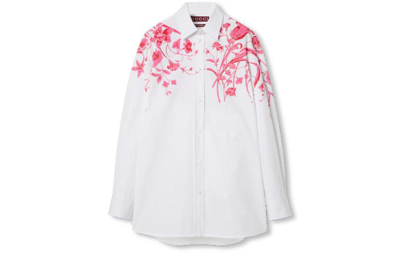

In [8]:
resize_image(
    create_image_from_bytes(image_bytes=base64_to_image( row['base64'][1]   )),
    400)

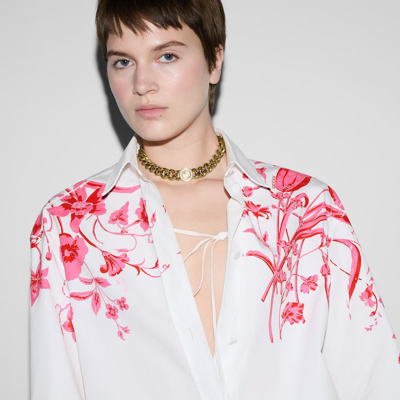

In [9]:
resize_image(
    create_image_from_bytes(image_bytes=base64_to_image( row['base64'][0]   )),
    400)

In [10]:
df_retail = WCf.world_construction.init_retail_gallery()
df_retail.head()

,id,Brand_id,Detail,Summary,Brand,Price
0,174,14,Type: Shirt / Fit: Regular fit / Sleeve...,"The shirt in the images is a contemporary, cas...",HM,9.99
1,175,15,Type: Shirt / Fit: Regular fit / Sleeve...,"The shirt featured in the images is a casual, ...",HM,9.99
2,176,16,Type: Shirt / Fit: Regular fit / Sleeve...,The shirt depicted in the images is a casual y...,HM,9.99
3,177,17,"Type: Top, Blouse / Fit: Regular fit / Slee...",The garment depicted in the images is a women'...,HM,9.99
4,178,18,Type: Long-sleeve top / Fit: Regular fit / ...,The garment is a casual women's long-sleeve sh...,HM,9.99


### Loading Chroma

In [11]:
vectorestore = WCf.world_construction.init_chroma_db()

c:\Users\juand\anaconda3\Lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
c:\Users\juand\anaconda3\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
c:\Users\juand\anaconda3\Lib\site-packages\transformers\utils\generic.py:482: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
c:\

In [12]:
query = "Summer"
docs = vectorestore.similarity_search(query)

In [13]:
docs[0].page_content

'The garment in the images is a crochet top made from a cotton-blend fabric, showcasing a relaxed and breathable fit suitable for warm seasons such as spring and summer. It features a sleeveless design with wide straps and a round neckline, providing a casual and comfortable aesthetic. The top has a distinct crochet texture that adds a touch of bohemian charm and handcrafted appeal. The material appears to have medium weight, offering moderate fluidity and drape, enhancing its laid-back, breezy style. It comes in a solid, warm beige color, which is versatile and neutral, making it easy to pair with various outfits. The transparency of the crochet pattern adds a subtle, airy feel, perfect for hot weather while still maintaining coverage. There are no visible pockets, lapels, or embellishments, keeping the design simple and unembellished. This top is ideal for casual, daytime occasions, such as beach outings, picnics, or casual meet-ups.'

### Testing feature 1 from scratch

In [ ]:
from Features import search_from_luxury_brands as Sf

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_core.documents import Document


In [ ]:
from langchain_community.embeddings.sentence_transformer import (
    SentenceTransformerEmbeddings,
)

In [ ]:
embedding_function = SentenceTransformerEmbeddings(model_name='all-mpnet-base-v2')

In [ ]:
store = InMemoryStore()
id_key = 'doc_id'

In [ ]:
from langchain_community.vectorstores import Chroma

In [ ]:
retriever = MultiVectorRetriever(
    vectorstore = vectorestore,
    byte_store = store,
    id_key=id_key, 
    search_kwargs={"k": 5},
    embedding_function = embedding_function
)

In [ ]:
doc_ids = range(14,57,1)

In [ ]:
df.iloc[1].Summary

In [ ]:
summary_docs = [
    Document(page_content=df.iloc[1].Summary, metadata={id_key: i})
    for i in range(14,57,1)
]

In [ ]:
retriever.docstore.mset(list(zip(doc_ids, summary_docs)))

In [ ]:
retriever.invoke('Summer')

In [ ]:
vectorstore.similarity_search('Summer')

## Feature 1: Find similar pieces from luxury brands in retail brands 

### library

In [14]:
from Features import search_from_luxury_brands as Sf

In [15]:
entity = Sf.seacrh_from_luxury_brands(description=description, vectorstore=vectorestore)

In [22]:
answer = entity.search_similarity_from_description()

### Organize in daframe for display

In [24]:
answer['answer']

'*Piece_1: The first piece is a long, oversized shirt made from 100% cotton, featuring a classic button-down front, long sleeves, and a relaxed fit. It is crafted from lightweight and breathable fabric suitable for warmer seasons. The shirt has a clean and minimalist design with no visible pockets, embellishments, or patterns, making it versatile for various occasions.\n\n*Piece_2: The second piece is a straight-cut shirt made from 100% lyocell, designed with a relaxed fit, long sleeves, and a button-down front. It is crafted from a smooth and fluid fabric ideal for spring and summer wear. The shirt features a classic collar and a solid neutral color, maintaining a clean and minimalist aesthetic suitable for casual and slightly formal occasions.\n\n*Piece_3: The third piece is a casual, loose-fit shirt with long sleeves, a standard cuff, and a classic button-front closure. It is made from lightweight cotton or a cotton-blend, suitable for transitional seasons like spring and autumn. Th

In [25]:
answer['answer'].replace('Piece_1: ','').replace('Piece_2: ','').replace('Piece_3: ','').replace('Piece_4: ','').replace('Piece_5: ','').replace('\n\n','').split('*')[1:]

['The first piece is a long, oversized shirt made from 100% cotton, featuring a classic button-down front, long sleeves, and a relaxed fit. It is crafted from lightweight and breathable fabric suitable for warmer seasons. The shirt has a clean and minimalist design with no visible pockets, embellishments, or patterns, making it versatile for various occasions.',
 'The second piece is a straight-cut shirt made from 100% lyocell, designed with a relaxed fit, long sleeves, and a button-down front. It is crafted from a smooth and fluid fabric ideal for spring and summer wear. The shirt features a classic collar and a solid neutral color, maintaining a clean and minimalist aesthetic suitable for casual and slightly formal occasions.',
 'The third piece is a casual, loose-fit shirt with long sleeves, a standard cuff, and a classic button-front closure. It is made from lightweight cotton or a cotton-blend, suitable for transitional seasons like spring and autumn. The shirt has a clean design 

In [19]:
for i in range(0,4):
    print(answer['context'][i].page_content)

The shirt depicted in the images is a casual, loose-fit piece designed for everyday wear. It features long sleeves with a standard cuff and a classic button-front closure. The neckline is a standard collar style, lending it a versatile look suitable for both semi-formal and casual settings. The material appears to be lightweight cotton or a cotton-blend, making it breathable and ideal for transitional seasons like spring and autumn. The shirt's primary color is a light beige, complemented by a subtle vertical stripe pattern in white, which enhances its texture without being too bold. The fabric is smooth and offers a comfortable, slightly fluid drape. There are no visible pockets, embellishments, or lapels, keeping the design clean and minimalist. The shirt's length extends to the hip, providing a relaxed silhouette that can be easily tucked in or worn out. The weight of the fabric suggests it is suitable for layering, making it a versatile addition to a wardrobe. This shirt is best su

In [20]:
for i in range(0,4):
    print(answer['context'][i].metadata['doc_id'])

20
38
45
40


In [36]:
def organize_data(answer):

    page_content = []
    metadata_1 = []
    metadata_2 = []
    doc_id =[]

    answers = answer['answer'].replace('Piece_1: ','').replace('Piece_2: ','').replace('Piece_3: ','').replace('Piece_4: ','').replace('Piece_5: ','').replace('\n\n','').split('*')[1:]

    for i in range(0,4):

        doc_id.append(answer['context'][i].metadata['doc_id'])
        page_content.append(answer['context'][i].page_content)
        metadata_1.append(answer['context'][i].metadata['img_1'])
        metadata_2.append(answer['context'][i].metadata['img_2'])

    df_init = pd.DataFrame([doc_id,answers, page_content,metadata_1,metadata_2]).T

    df_init = pd.DataFrame(df_init)

    df_init.rename(columns={0:"Id",1:"Answer",2:"Summary",3:"Img_1",4:"Img_2"},inplace=True)


    return df_init

    

In [37]:
df_recommendations = organize_data(answer=answer)
df_recommendations

,Id,Answer,Summary,Img_1,Img_2
0,20,The shirt depicted in the images is similar to...,"The shirt depicted in the images is a casual, ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
1,45,The shirt depicted in the images is also simil...,"The shirt depicted in the images is a long, ov...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
2,40,The garment made from 100% lyocell is comparab...,The garment is a straight-cut shirt made from ...,"data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
3,38,The shirt made from 100% linen is similar to y...,"This shirt is a straight-fit, long-sleeve top ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ...","data:image/jpeg;base64, /9j/4AAQSkZJRgABAQAAAQ..."
4,None,"The casual, loose-fit blouse depicted in the i...",None,None,None


In [ ]:
for index, row in df_recommendations.iterrows():
    print(row['Id'])

In [ ]:
df_retail[df_retail.Brand_id == 38]

### Recreating features

In [ ]:
### lets set up the system
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

from langchain_openai import ChatOpenAI


import sys, os 

apikey = 'sk-proj-OvVavmDwvsvUHryza7P7T3BlbkFJ9K11gPvYgUYrNbDFjUOd'

In [ ]:
#Setting up retriever
retriever = vectorestore.as_retriever(search_kwargs={"k": 5})

In [ ]:
#Getting a generalization of the description
description_generalization = ''

In [ ]:
os.environ['OPENAI_API_KEY'] = apikey

turbo_llm = ChatOpenAI(
    temperature=0.2,
    model_name='gpt-4o-mini'
)


In [ ]:
system_prompt = ( """
    
    You are a search engine for clothing. 
    Use the following retrieved context to find clothing with a similar descriptions.
    
    \n\n
    Context: "{context}"
    
    If you don't know the answer, say that you.
    """                         
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(turbo_llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

query = f"""
    I have this peace of clothing: {description_generalization}

    Answer ONLY THE FOLLOWING FORM, describing how the 5 pieces of clothing are similar to the one i have:
    *Piece_1: Explanation
    *Piece_2: Explanation
    *Piece_3: Explanation
    *Piece_4: Explanation
    *Piece_5: Explanation
    
"""

response = rag_chain.invoke({"input": description_generalization})


## Feature 2: Find pieces from user prompt description ( Text prompt to suggestions)

### Feature 3: Find pieces similar to user provided piece ( Image to suggestions)